<a href="https://colab.research.google.com/github/Sunn24/Stiffness-data-processing/blob/main/JPKSPM_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In [1]:
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns # for data visualization
from scipy.signal import argrelmin

In [ ]:
!pip install afmformats
import afmformats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/1_cc2-5_gs40_sp120_p128_100um_p41-0_a1_map_17-data-2023.08.22-08.48.22.054.jpk-qi-data'

In [ ]:
dslist = afmformats.load_data(path)

In [ ]:
metadslist = afmformats.formats.fmt_jpk.load_jpk(path, callback=None, meta_override=None)

In [ ]:
dslist[0].columns

['force', 'height (measured)', 'height (piezo)', 'segment', 'time']

In [ ]:
dslist[0]['force'][0]

-6.602539467839418e-09

In [ ]:
afmformats.afm_data.column_units

{'force': 'N',
 'height (measured)': 'm',
 'height (piezo)': 'm',
 'index': '',
 'segment': '',
 'time': 's',
 'tip position': 'm'}

In [ ]:
metadslist[131]

{'data': <afmformats.lazy_loader.LazyData at 0x7cc2ee5204c0>,
 'metadata': {'sensitivity': 2.806341645231442e-08,
  'spring constant': 1.9252841538283167,
  'feedback mode': 'contact',
  'duration': 0.008,
  'point count': 600,
  'session id': '2023.08.22-03.41.35-00099',
  'grid center x': 0.0,
  'grid center y': 0.0,
  'grid shape x': 128,
  'grid shape y': 128,
  'grid size x': 9.999999999999999e-05,
  'grid size y': 9.999999999999999e-05,
  'instrument': 'JPK00720',
  'position x': -4.7265625e-05,
  'grid index x': 3,
  'position y': -4.8828124999999996e-05,
  'grid index y': 1,
  'software version': '6.1.200',
  'software': 'JPK',
  'enum': 131,
  'path': PosixPath('/content/drive/MyDrive/1_cc2-5_gs40_sp120_p128_100um_p41-0_a1_map_17-data-2023.08.22-08.48.22.054.jpk-qi-data'),
  'rate retract': 75000.0,
  'speed retract': 0.00025000000000000006,
  'duration retract': 0.004,
  'segment count': 2,
  'imaging mode': 'force-distance',
  'curve id': '2023.08.22-03.41.35-00099:131',
  '

In [ ]:
metadslist[131]['metadata']['grid index x'],metadslist[131]['metadata']['grid index y']

(3, 1)

In [ ]:
metadslist[16383]['metadata']['point count']

578

In [ ]:
def np_index(list_a,value_to_find_index):
  # return list_a.tolist().index(value_to_find_index)
  return np.where(list_a==value_to_find_index)[0][0]
def min_list(list_a):
  # return list_a.tolist().index(min(list_a))
  return np.where(list_a==np.min(list_a))[0][0]
def max_list(list_a):
  # return list_a.tolist().index(max(list_a))
  return np.where(list_a==np.max(list_a))[0][0]
def mean_list(list_a):
  return list_a.tolist().index(sum(list_a)/len(list_a))
def relative_min_backward(a_list):
  for i in range(len(a_list)-1,-1,-1):
    if a_list[i]<a_list[i-1]:
      return i

# Vitualization

In [ ]:
count=[]
for i in range(128):
  count.append([])
  for j in range(128):
    # count[i].append(len(dslist[128*(127-i)+j]))
    count[i].append(min(dslist[128*(127-i)+j]['height (measured)']))

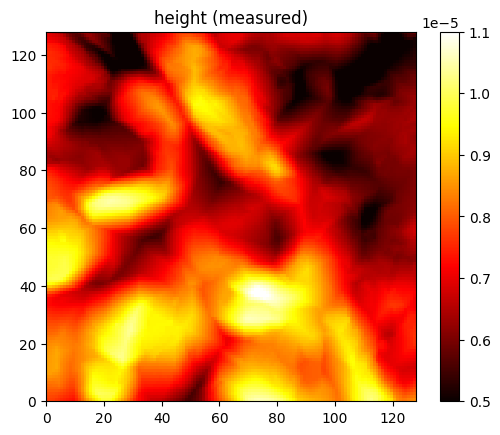

In [ ]:
plt.imshow(count,cmap='hot', interpolation='nearest',vmin=5*pow(10,-6),vmax=(1.1)*pow(10,-5),extent=[0, 128,0,128])
plt.colorbar()
plt.title( "height (measured)")
plt.show()

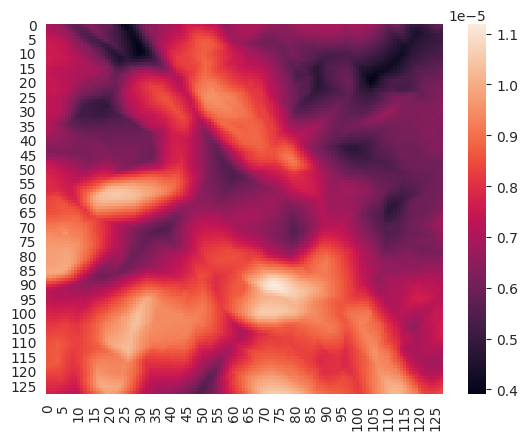

In [ ]:
hm = sns.heatmap(data=count, annot=False)
plt.show()

In [ ]:
average_data=[]
for i in range(128):
  average_data.append([])
  for j in range(128):
    average_data[i].append(sum(dslist[128*(127-i)+j]['height (measured)'])/len(dslist[128*(127-i)+j]['height (measured)']))

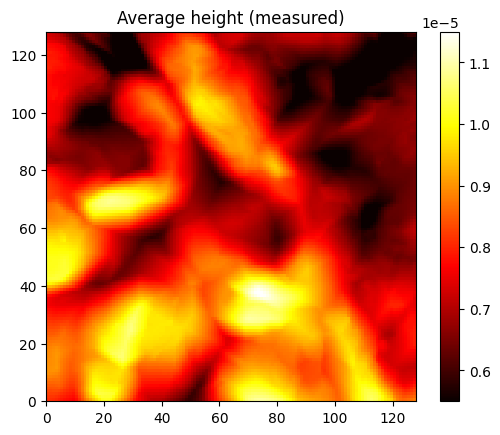

In [ ]:
plt.imshow(average_data,cmap='hot', interpolation='nearest',vmin=(5.5)*pow(10,-6),vmax=(1.15)*pow(10,-5),extent=[0, 128,0,128])
plt.colorbar()
plt.title( "Average height (measured)")
plt.show()

In [ ]:
average_data_piezo=[]
for i in range(128):
  average_data_piezo.append([])
  for j in range(128):
    average_data_piezo[i].append(sum(dslist[128*(127-i)+j]['height (piezo)'])/len(dslist[128*(127-i)+j]['height (piezo)']))

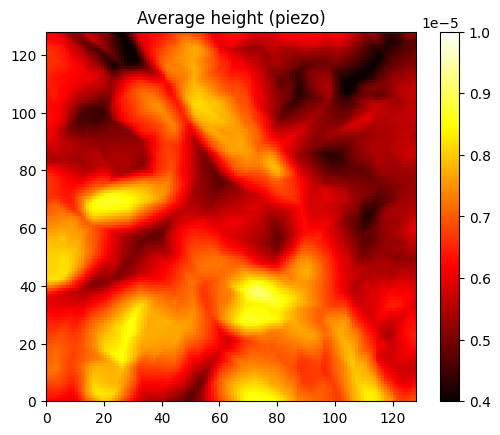

In [ ]:
plt.imshow(average_data_piezo,cmap='hot', interpolation='nearest',vmin=(4)*pow(10,-6),vmax=(1)*pow(10,-5),extent=[0, 128,0,128])
plt.colorbar()
plt.title( "Average height (piezo)")
plt.show()

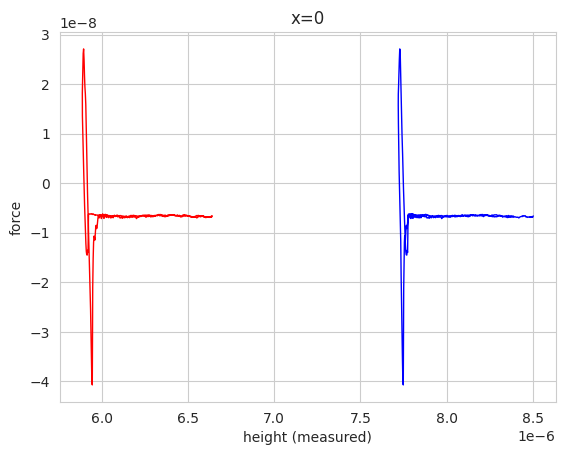

In [ ]:
sns.set_style("whitegrid")
fig = plt.figure()
plt.title("x=0")
# plt.xlim()
# plt.ylim()
# plt.xticks()
# plt.yticks()
plt.xlabel("height (measured)")
plt.ylabel("force")
plt.plot(dslist[0]['height (measured)'],dslist[0]['force'], linestyle = '-',color ="b",linewidth=1) ## [list of y at x=0][list of y at x=1]
plt.plot(dslist[0]['height (piezo)'],dslist[0]['force'], linestyle = '-',color ="r",linewidth=1) ## [list of y at x=0][list of y at x=1]
# fig.patch.set_facecolor("xkcd:off white")
plt.show()

In [ ]:
min_forcedata=[]
for i in range(128):
  min_forcedata.append([])
  for j in range(128):
    index=dslist[128*(127-i)+j]['force'].tolist().index(min(dslist[128*(127-i)+j]['force']))
    min_forcedata[i].append(dslist[128*(127-i)+j]['height (measured)'][index])

In [ ]:
plt.imshow(min_forcedata,cmap='afmhot', interpolation='nearest',vmin=(5)*pow(10,-6),vmax=(1.1)*pow(10,-5),extent=[0, 128,0,128])
plt.colorbar()
plt.title( "height (measured) of (min) force")
plt.show()

# Analysis

* https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn-set-style

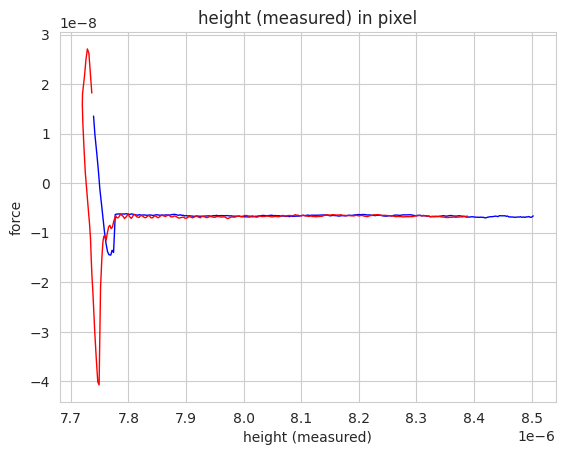

In [ ]:
i=0
x=dslist[i]['height (measured)'][min_list(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]
y=dslist[i]['force'][min_list(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]
sns.set_style("whitegrid")
fig = plt.figure()
plt.title("height (measured) in pixel")
# plt.xlim()
# plt.ylim()
# plt.xticks()
# plt.yticks()
plt.xlabel("height (measured)")
plt.ylabel("force")
plt.plot(dslist[i]['height (measured)'][:np_index(dslist[i]['segment'],1)],dslist[i]['force'][:np_index(dslist[i]['segment'],1)], linestyle = '-',color ="b",linewidth=1) ## [list of y at x=0][list of y at x=1]
plt.plot(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1):],dslist[i]['force'][np_index(dslist[i]['segment'],1):], linestyle = '-',color ="r",linewidth=1) ## [list of y at x=0][list of y at x=1]
plt.show()

## Stiffness and Adhesiveness

**Concept**

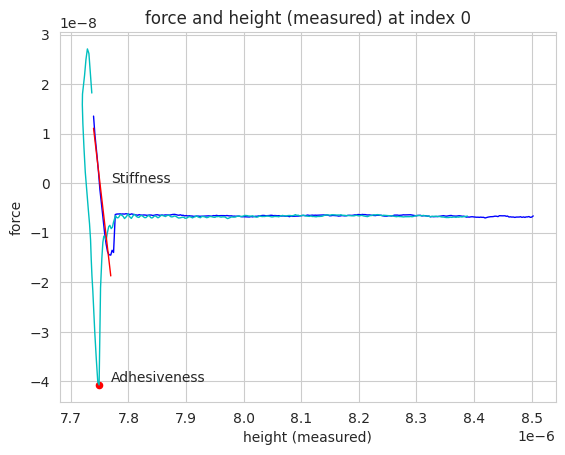

In [ ]:
i=0
sns.set_style("whitegrid")
fig = plt.figure()
plt.title('force and height (measured) at index '+str(i))
plt.xlabel("height (measured)")
plt.ylabel("force")

x=dslist[i]['height (measured)'][min_list(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]
y=dslist[i]['force'][min_list(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]
plt.plot(dslist[i]['height (measured)'][:np_index(dslist[i]['segment'],1)],dslist[i]['force'][:np_index(dslist[i]['segment'],1)], linestyle = '-',color ="b",linewidth=1)
plt.plot(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1):],dslist[i]['force'][np_index(dslist[i]['segment'],1):], linestyle = '-',color ="c",linewidth=1)


## Adhesiveness ##
plt.scatter(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],dslist[i]['force'][min_list(dslist[i]['force'])],color ="r",s=20)

p = np.poly1d(np.polyfit(x, y, 1))
t = np.linspace(x[0], x[-1], 20)
plt.plot(t, p(t), '-',color='r',linewidth=1, markersize=2)
plt.text((7.77)*pow(10,-6), (-4)*pow(10,-8), 'Adhesiveness')
plt.text((7.77)*pow(10,-6), 0, 'Stiffness')
plt.show()

In [ ]:
Stiffness,Adhesiveness=[],[]
for i in range(128):
  Stiffness.append([])
  Adhesiveness.append([])
  for j in range(128):
    Adhesiveness[i].append(np.min(dslist[128*(127-i)+j]['force'],axis=0))
    x=dslist[128*(127-i)+j]['height (measured)'][argrelmin(dslist[128*(127-i)+j]['force'][dslist[128*(127-i)+j]['segment']==0])[0][-1]:len(dslist[128*(127-i)+j]['force'][dslist[128*(127-i)+j]['segment']==0])]
    y=dslist[128*(127-i)+j]['force'][argrelmin(dslist[128*(127-i)+j]['force'][dslist[128*(127-i)+j]['segment']==0])[0][-1]:len(dslist[128*(127-i)+j]['force'][dslist[128*(127-i)+j]['segment']==0])]
    Stiffness[i].append(np.polyfit(x, y, 1)[0])

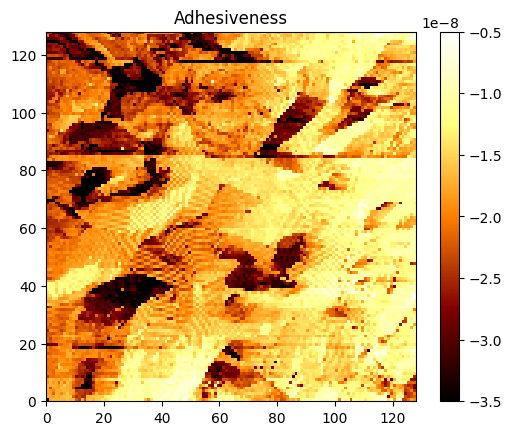

In [ ]:
# plt.imshow(Adhesiveness,cmap='hot', interpolation='nearest',extent=[0, 128,0,128])
plt.imshow(Adhesiveness,cmap='afmhot', interpolation='nearest',vmin=(-3.5)*pow(10,-8),vmax=(-0.5)*pow(10,-8),extent=[0, 128,0,128])
plt.colorbar()
plt.title("Adhesiveness")
plt.show()

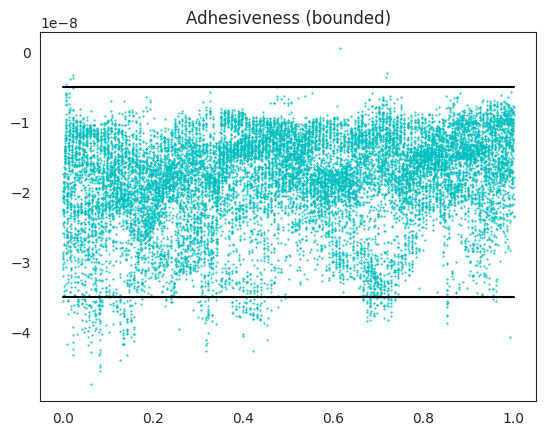

In [ ]:
a=[]
for i in range(len(Adhesiveness)):
  a=a+Adhesiveness[i]
plt.title("Adhesiveness (bounded)")
# Setting our seed as 12
# np.random.seed(12)
# X-Coordinates
x = np.linspace( 0, 1, 128*128 )

# Polynomial equation
y = a

# Using polyfit func with 4 degrees
p = np.poly1d( np.polyfit(x, y, 1) ) # polyfit
t = np.linspace(0, 1, 128*128)
# Plotting our polynomial function
plt.plot(x, y, 'co', markersize=0.5)
# plt.plot(t, p(t), 'r-')
# plt.plot(x, y, 'co',t, p(t), 'r-', markersize=0.5)
plt.plot([0,1],[(-0.5)*pow(10,-8),(-0.5)*pow(10,-8)], 'k-',[0,1],[(-3.5)*pow(10,-8),(-3.5)*pow(10,-8)], 'k-')
# print(p)
plt.show()

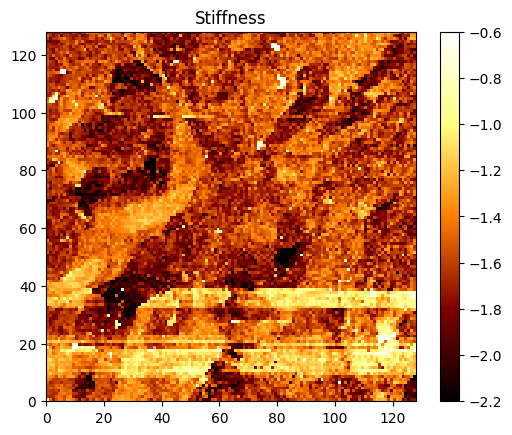

In [ ]:
# sns.set_style("white")
plt.imshow(Stiffness,cmap='afmhot', interpolation='nearest',vmin=-2.2,vmax=-0.6,extent=[0, 128,0,128])
plt.colorbar()
plt.title("Stiffness")
plt.show()

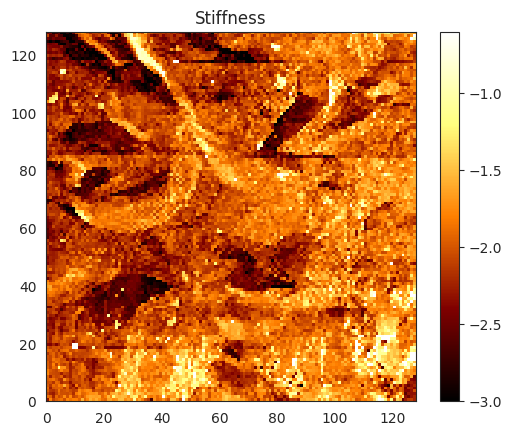

In [ ]:
### New stiffness
plt.imshow(Stiffness,cmap='afmhot', interpolation='nearest',vmin=-3,vmax=-0.6,extent=[0, 128,0,128])
plt.colorbar()
plt.title("Stiffness")
plt.show()

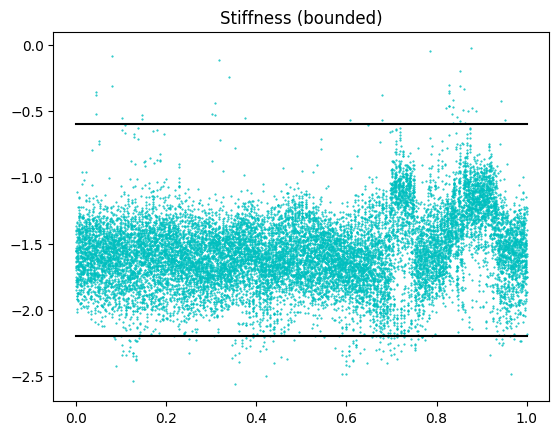

In [ ]:
a=[]
for i in range(len(Stiffness)):
  a=a+Stiffness[i]
plt.title("Stiffness (bounded)")
# Setting our seed as 12
# np.random.seed(12)
# X-Coordinates
x = np.linspace( 0, 1, 128*128 )

# Polynomial equation
y = a

# Using polyfit func with 4 degrees
p = np.poly1d( np.polyfit(x, y, 1) ) # polyfit
t = np.linspace(0, 1, 128*128)
# Plotting our polynomial function
plt.plot(x, y, 'co', markersize=0.5)
plt.plot([0,1],[-0.6,-0.6], 'k-',[0,1],[-2.2,-2.2], 'k-')
# print(p)
plt.show()

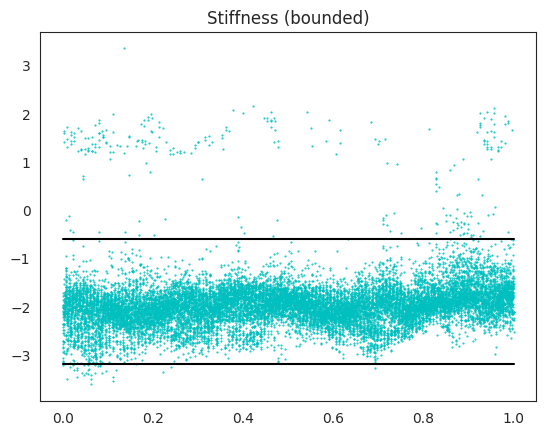

In [ ]:
a=[]
for i in range(len(Stiffness)):
  a=a+Stiffness[i]
plt.title("Stiffness (bounded)")
# Setting our seed as 12
# np.random.seed(12)
# X-Coordinates
x = np.linspace( 0, 1, 128*128 )

# Polynomial equation
y = a

# Using polyfit func with 4 degrees
p = np.poly1d( np.polyfit(x, y, 1) ) # polyfit
t = np.linspace(0, 1, 128*128)
# Plotting our polynomial function
plt.plot(x, y, 'co', markersize=0.5)
plt.plot([0,1],[-0.6,-0.6], 'k-',[0,1],[-3.2,-3.2], 'k-')
# print(p)
plt.show()

##IMAGE from txt

In [ ]:
stiffness=np.multiply(np.genfromtxt("/content/drive/MyDrive/stiffness.txt"),-1)
adhesiveness=np.multiply(np.genfromtxt("/content/drive/MyDrive/Adhesiveness.txt"),-1)

In [ ]:
type(stiffness[0][0])

numpy.float64

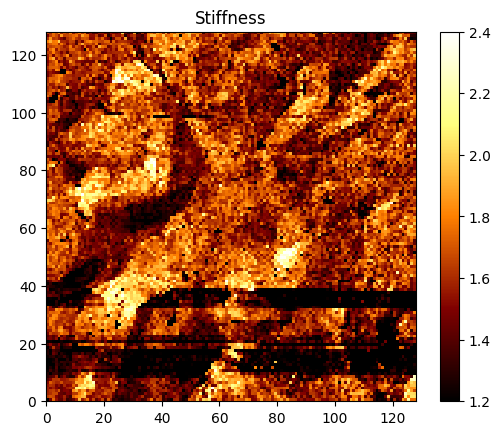

In [ ]:
plt.imshow(stiffness,cmap='afmhot', interpolation='nearest',vmin=1.2,vmax=2.4,extent=[0, 128,0,128])
plt.colorbar()
plt.title("Stiffness")
plt.show()

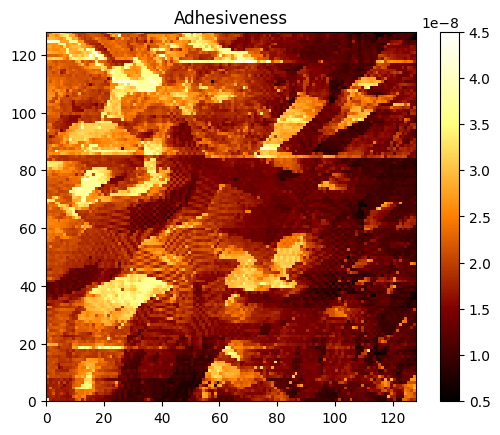

In [ ]:
plt.imshow(adhesiveness,cmap='afmhot', interpolation='nearest',vmin=(0.5)*pow(10,-8),vmax=(4.5)*pow(10,-8),extent=[0, 128,0,128])
plt.colorbar()
plt.title("Adhesiveness")
plt.show()

## IMAGE from JPKSPM

In [ ]:
### Import from JPKSPM image processing
adhesion=np.genfromtxt("/content/drive/MyDrive/Adhesion-1.txt")
measure_slope=np.genfromtxt("/content/drive/MyDrive/Measure-Slope-1.txt")

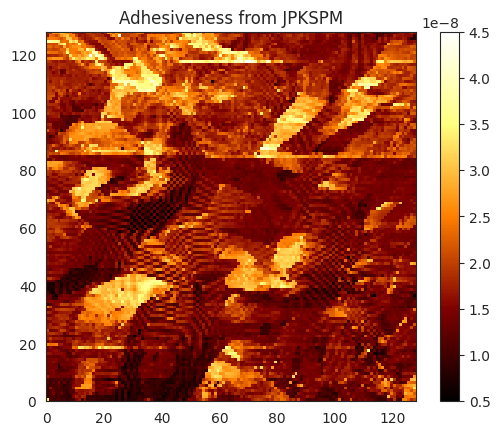

In [ ]:
sns.set_style("white")
adhesion_new=[]
for i in range(128):
  adhesion_new.append([])
  for j in range(128):
    adhesion_new[i].append(adhesion[127-i][j])
plt.imshow(adhesion_new,cmap='afmhot', interpolation='nearest',vmin=(0.5)*pow(10,-8),vmax=(4.5)*pow(10,-8),extent=[0, 128,0,128])
plt.colorbar()
plt.title("Adhesiveness from JPKSPM")
plt.show()

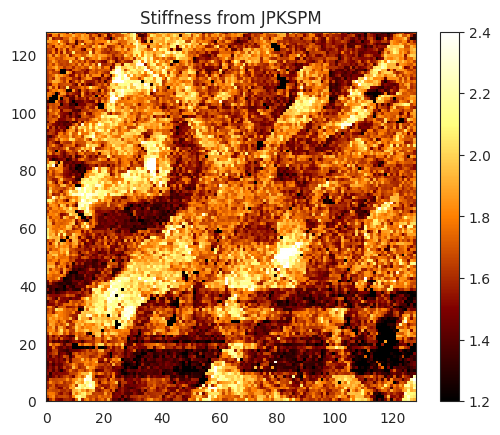

In [ ]:
# sns.set_style("white")
measure_slope_new=[]
for i in range(128):
  measure_slope_new.append([])
  for j in range(128):
    measure_slope_new[i].append(measure_slope[127-i][j])
plt.imshow(measure_slope_new,cmap='afmhot', interpolation='nearest',vmin=1.2,vmax=2.4,extent=[0, 128,0,128])
# plt.imshow(measure_slope_new,cmap='afmhot', interpolation='nearest',vmin=-2.2,vmax=-0.6,extent=[0, 128,0,128])
plt.colorbar()
plt.title("Stiffness from JPKSPM")
plt.show()

## compare

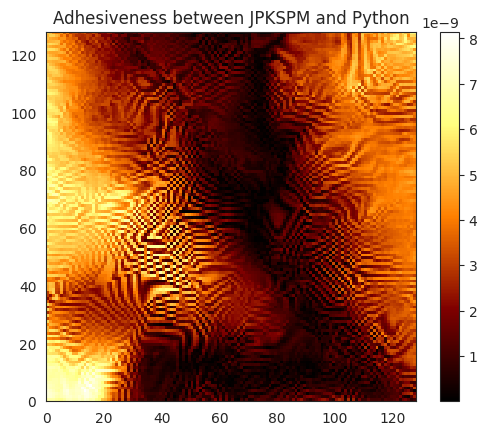

In [ ]:
sns.set_style("white")
plt.imshow(np.abs(adhesiveness-np.array(adhesion_new)),cmap='afmhot', interpolation='nearest',extent=[0, 128,0,128])
plt.colorbar()
plt.title("Adhesiveness between JPKSPM and Python")
plt.show()

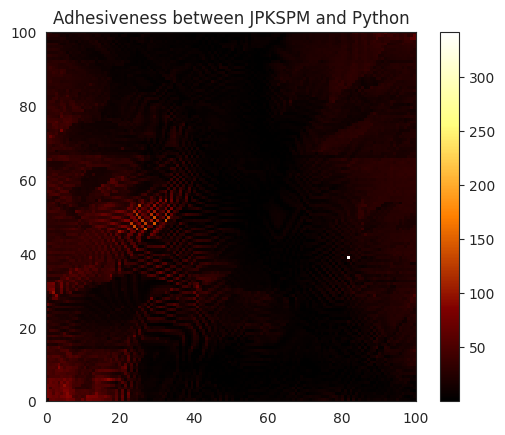

In [ ]:
sns.set_style("white")
plt.imshow(np.abs(adhesiveness-np.array(adhesion_new))/np.array(adhesion_new)*100,cmap='afmhot', interpolation='nearest',extent=[0, 100,0,100])
plt.colorbar()
plt.title("Adhesiveness between JPKSPM and Python")
plt.show()

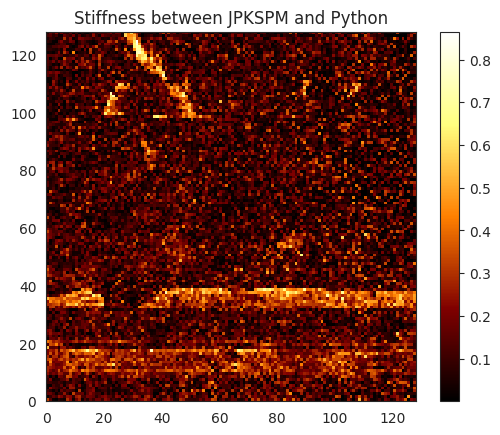

In [ ]:
sns.set_style("white")
plt.imshow(np.abs(stiffness-np.array(measure_slope_new)),cmap='afmhot', interpolation='nearest',extent=[0, 128,0,128])
plt.colorbar()
plt.title("Stiffness between JPKSPM and Python")
plt.show()

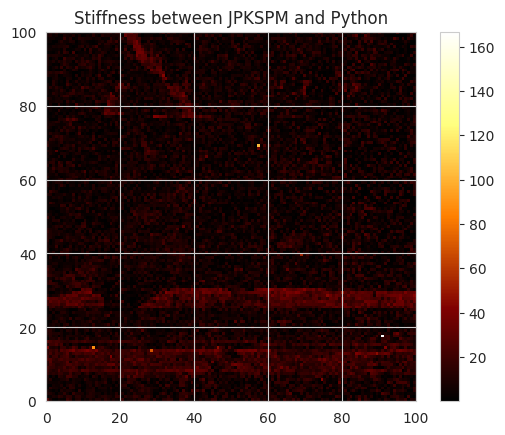

In [ ]:
sns.set_style("whitegrid")
plt.imshow(np.abs(stiffness-np.array(measure_slope_new))/np.array(measure_slope_new)*100,cmap='afmhot', interpolation='nearest',extent=[0,100,0,100])
plt.colorbar()
plt.title("Stiffness between JPKSPM and Python")
plt.show()

## RECHECK

In [ ]:
def convert(i,j):
  return 128*(127-i)+j

In [ ]:
def pixel(i,j):
  return round(-49.61+(0.3906*2)*j,2),round(-49.61+(0.3906*2)*(127-i),2)

In [ ]:
pixel(127,0)

(-49.61, -49.61)

In [ ]:
argrelmin(dslist[i]['force'][dslist[i]['segment']==1])[0][0]

23

In [ ]:
np_index(dslist[i]['segment'],1)+argrelmin(dslist[i]['force'][dslist[i]['segment']==1])[0][0]

323

In [ ]:
max_list(dslist[i]['force'])

303

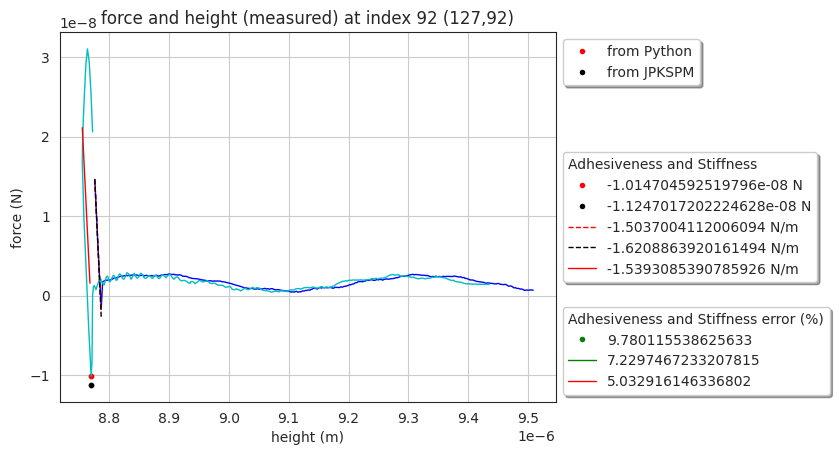

In [ ]:
x_pixel,y_pixel=127,92 ##(78,104) (105,116)
i=convert(x_pixel,y_pixel) #7071 106 #2314 10807

Adhesiveness1=dslist[i]['force'][min_list(dslist[i]['force'])]

# x=dslist[i]['height (measured)'][relative_min_backward(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]
# y=dslist[i]['force'][relative_min_backward(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]

### Improved from relative backward ###
x=dslist[i]['height (measured)'][argrelmin(dslist[i]['force'][dslist[i]['segment']==0])[0][-1]:len(dslist[i]['force'][dslist[i]['segment']==0]) ]
y=dslist[i]['force'][argrelmin(dslist[i]['force'][dslist[i]['segment']==0])[0][-1]:len(dslist[i]['force'][dslist[i]['segment']==0])]

x2=dslist[i]['height (measured)'][max_list(dslist[i]['force']):np_index(dslist[i]['segment'],1)+min_list(dslist[i]['force'][dslist[i]['segment']==1])]
y2=dslist[i]['force'][max_list(dslist[i]['force']):np_index(dslist[i]['segment'],1)+min_list(dslist[i]['force'][dslist[i]['segment']==1])]

# Stiffness_unit.append(np.polyfit(x, y, 1)[0])

# sns.set_style("whitegrid")
fig = plt.figure()
plt.title('force and height (measured) at index '+str(i)+' ('+str(x_pixel)+','+str(y_pixel)+')')
# plt.xlim([7.52*pow(10,-6),7.53*pow(10,-6)])
# plt.ylim([(-1)*pow(10,-9),pow(10,-9)])
# plt.xlim([6.83*pow(10,-6),6.85*pow(10,-6)])
# plt.xlim([6.8*pow(10,-6),6.9*pow(10,-6)])
# plt.xticks()
# plt.yticks()
plt.xlabel("height (m)")
plt.ylabel("force (N)")
plt.plot(dslist[i]['height (measured)'][:np_index(dslist[i]['segment'],1)],dslist[i]['force'][:np_index(dslist[i]['segment'],1)], linestyle = '-',color ="b",linewidth=1)
plt.plot(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1):],dslist[i]['force'][np_index(dslist[i]['segment'],1):], linestyle = '-',color ="c",linewidth=1)
# plt.scatter(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1:np_index(dslist[i]['segment'],1)+1],dslist[i]['force'][np_index(dslist[i]['segment'],1)-1:np_index(dslist[i]['segment'],1)+1],color ="g",s=15)
# plt.scatter(dslist[i]['height (measured)'][min_list(dslist[i]['force'][:np_index(dslist[i]['segment'],1)])],dslist[i]['force'][min_list(dslist[i]['force'][:np_index(dslist[i]['segment'],1)])],color ="g",s=20)
plt.scatter(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],dslist[i]['force'][min_list(dslist[i]['force'])],color ="r",s=10)
# plt.scatter(dslist[i]['height (measured)'][0],dslist[i]['force'][0],color ="g",s=20)
# plt.text((7.77)*pow(10,-6), (-4)*pow(10,-8), 'Adhesiveness')
p = np.poly1d(np.polyfit(x, y, 1))
t = np.linspace(x[0], x[-1], 20)
plt.plot(t, p(t), '--',color='r',linewidth=1, markersize=1)
p = np.poly1d(np.polyfit(x2, y2, 1))
t = np.linspace(x2[min_list(x2)], x2[max_list(x2)], 30)
plt.plot(t, p(t), '-',color='r',linewidth=1, markersize=1)
# plt.text((7.77)*pow(10,-6), 0, 'Stiffness')
# fig.patch.set_facecolor("xkcd:off white")

# plt.scatter(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1],dslist[i]['force'][np_index(dslist[i]['segment'],1)-1],color ="g",s=10)
# y_intercept = y1-x1(slope)
x1 = np.linspace(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1],dslist[i]['height (measured)'][relative_min_backward(dslist[i]['force'][:np_index(dslist[i]['segment'],1)])],2)
y1 = ((-1)*measure_slope_new[x_pixel][y_pixel])*(x1-dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1])+dslist[i]['force'][np_index(dslist[i]['segment'],1)-1]
plt.plot(x1, y1, '--k',linewidth=1)
plt.scatter(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],(-1)*adhesion_new[x_pixel][y_pixel],color ="k",s=10)

### write adhesiveness values
# plt.text(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],dslist[i]['force'][min_list(dslist[i]['force'])], dslist[i]['force'][min_list(dslist[i]['force'])],horizontalalignment='left',verticalalignment='top')
# plt.text(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],(-1)*adhesion_new[x_pixel][y_pixel],(-1)*adhesion_new[x_pixel][y_pixel],horizontalalignment='left',verticalalignment='top')
colors=['red','black']
values2=['from Python','from JPKSPM']
legend_elements2= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=values2[j] ,markerfacecolor=colors[j],markersize=5) for j in range(2)]
legend=plt.legend(handles=legend_elements2,
    loc='upper left',
    bbox_to_anchor=(1,1),
    fancybox=True,
    shadow=True,
)
# (np.abs(stiffness-np.array(measure_slope_new))/np.array(measure_slope_new)*100)[x_pixel][y_pixel]
# (np.abs(adhesiveness-np.array(adhesion_new))/np.array(adhesion_new)*100)[x_pixel][y_pixel]
values=[dslist[i]['force'][min_list(dslist[i]['force'])],(-1)*adhesion_new[x_pixel][y_pixel],(-1)*stiffness[x_pixel][y_pixel],(-1)*measure_slope_new[x_pixel][y_pixel]]
legend_elements= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=str(values[j])+' N' ,markerfacecolor=colors[j],markersize=5) for j in range(2)]
legend_elements+= [Line2D([0], [7*pow(10,-6)],linestyle='--', linewidth=1, color=colors[j], label=str(values[j+2])+' N/m') for j in range(2)]
legend_elements+= [Line2D([0], [7*pow(10,-6)], linewidth=1, color='r', label=str(np.polyfit(x2, y2, 1)[0])+' N/m')]
value_legend=plt.legend(handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1,0.5),
    fancybox=True,
    shadow=True,
    title='Adhesiveness and Stiffness',
    alignment='left'
)
error_values=[(np.abs(adhesiveness-np.array(adhesion_new))/np.array(adhesion_new)*100)[x_pixel][y_pixel],(np.abs(stiffness-np.array(measure_slope_new))/np.array(measure_slope_new)*100)[x_pixel][y_pixel]]
error_legend_elements= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=error_values[0] ,markerfacecolor='g',markersize=5)]
error_legend_elements+= [Line2D([0], [7*pow(10,-6)], linewidth=1, color='g', label=error_values[1])]
error_legend_elements+= [Line2D([0], [7*pow(10,-6)], linewidth=1, color='r', label=  (np.abs(np.polyfit(x2, y2, 1)[0]+np.array(measure_slope_new)[x_pixel][y_pixel])/np.array(measure_slope_new)[x_pixel][y_pixel])*100 )]
error_legend=plt.legend(handles=error_legend_elements,
    loc='lower left',
    bbox_to_anchor=(1, 0),
    fancybox=True,
    shadow=True,
    title='Adhesiveness and Stiffness error (%)',
    alignment='left'
)
plt.gca().add_artist(value_legend)
plt.gca().add_artist(legend)
plt.grid()
plt.show()

In [ ]:
stiffness[x_pixel][y_pixel]

1.5037004112006094

In [ ]:
np.polyfit(x2, y2, 1)[0]

-1.5393085390785926

In [ ]:
(np.abs(stiffness-np.array(measure_slope_new))/np.array(measure_slope_new))[x_pixel][y_pixel]

0.07229746723320782

In [ ]:
np.array(measure_slope_new)[x_pixel][y_pixel]

1.6208863920161494

In [ ]:
error_adhesion=np.genfromtxt("/content/drive/MyDrive/error.txt")
error_adhesion[2]

array([7.5563016e-06, 7.8155000e-10, 8.1214990e-06, 7.5556327e-06,
       3.3333334e-05, 3.3333334e-05])

In [ ]:
adhesion_new[0][0]

1.7867446410341902e-08

In [ ]:
adhesiveness[0][0]

2.3193197789261073e-08

In [ ]:
dslist[convert(0,0)]['force'][min_list(dslist[convert(0,0)]['force'])]

-2.3193197789261073e-08

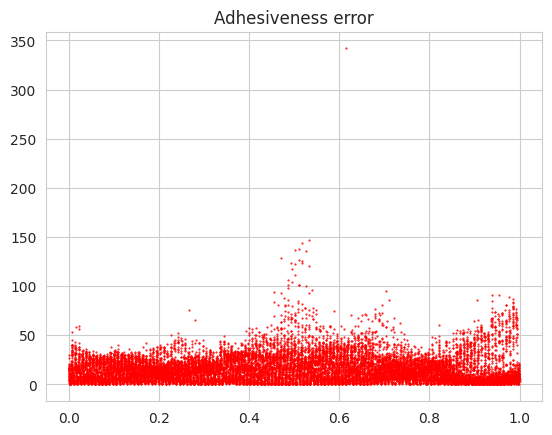

In [ ]:
a=[]
for i in range(len(adhesiveness)):
  for j in range(len(adhesiveness)):
    a.append(adhesiveness[i][j])
b=[]
for i in range(len(adhesion_new)):
  for j in range(len(adhesion_new)):
    b.append(adhesion_new[i][j])
plt.title("Adhesiveness error")
c=[]
for i in range(len(adhesion_new)):
  for j in range(len(adhesion_new)):
    c.append(abs(adhesion_new[i][j]-adhesiveness[i][j])/adhesion_new[i][j]*100)
# Setting our seed as 12
# np.random.seed(12)
# X-Coordinates
x = np.linspace( 0, 1, 128*128 )
y = a
# Plotting our polynomial function
# plt.plot(x, a, 'co', markersize=0.5)
plt.plot(x, c, 'ro', markersize=0.5)

# plt.plot([0,1],[-0.6,-0.6], 'k-',[0,1],[-2.2,-2.2], 'k-')
# print(p)
plt.show()

# Save files

In [ ]:
f1 = open("/content/drive/MyDrive/stiffness.txt", "x")
f2 = open("/content/drive/MyDrive/Adhesiveness.txt", "x")
np.savetxt("/content/drive/MyDrive/stiffness.txt", Stiffness)
np.savetxt("/content/drive/MyDrive/Adhesiveness.txt",Adhesiveness)
# file = open("/content/drive/MyDrive/myfile.txt", "w+")
# content = str(Stiffness)
# file.write(content)
# file.close()

# Results

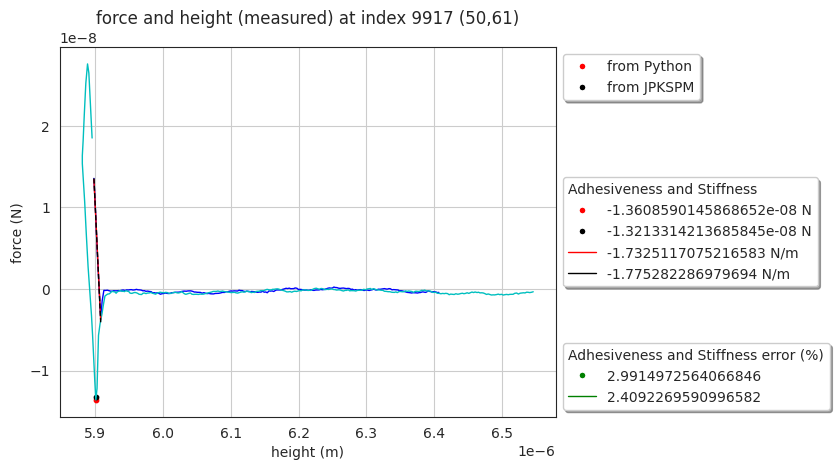

In [ ]:
x_pixel,y_pixel=50,61 ##(78,104) (105,116)
i=convert(x_pixel,y_pixel) #7071 106 #2314 10807

Adhesiveness1=dslist[i]['force'][min_list(dslist[i]['force'])]
x=dslist[i]['height (measured)'][relative_min_backward(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]
y=dslist[i]['force'][relative_min_backward(dslist[i]['force'][:np_index(dslist[i]['segment'],1)]):np_index(dslist[i]['segment'],1)]
sns.set_style("white")
fig = plt.figure()
plt.title('force and height (measured) at index '+str(i)+' ('+str(x_pixel)+','+str(y_pixel)+')')
plt.xlabel("height (m)")
plt.ylabel("force (N)")
plt.plot(dslist[i]['height (measured)'][:np_index(dslist[i]['segment'],1)],dslist[i]['force'][:np_index(dslist[i]['segment'],1)], linestyle = '-',color ="b",linewidth=1)
plt.plot(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1):],dslist[i]['force'][np_index(dslist[i]['segment'],1):], linestyle = '-',color ="c",linewidth=1)
plt.scatter(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],dslist[i]['force'][min_list(dslist[i]['force'])],color ="r",s=10)

p = np.poly1d(np.polyfit(x, y, 1))
t = np.linspace(x[0], x[-1], 20)
plt.plot(t, p(t), '-',color='r',linewidth=1, markersize=1)

x1 = np.linspace(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1],dslist[i]['height (measured)'][relative_min_backward(dslist[i]['force'][:np_index(dslist[i]['segment'],1)])],2)
y1 = ((-1)*measure_slope_new[x_pixel][y_pixel])*(x1-dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1])+dslist[i]['force'][np_index(dslist[i]['segment'],1)-1]
plt.plot(x1, y1, '--k',linewidth=1)
plt.scatter(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],(-1)*adhesion_new[x_pixel][y_pixel],color ="k",s=10)

colors=['red','black']
values2=['from Python','from JPKSPM']
legend_elements2= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=values2[j] ,markerfacecolor=colors[j],markersize=5) for j in range(2)]
legend=plt.legend(handles=legend_elements2,
    loc='upper left',
    bbox_to_anchor=(1,1),
    fancybox=True,
    shadow=True,
)
values=[dslist[i]['force'][min_list(dslist[i]['force'])],(-1)*adhesion_new[x_pixel][y_pixel],(-1)*stiffness[x_pixel][y_pixel],(-1)*measure_slope_new[x_pixel][y_pixel]]
legend_elements= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=str(values[j])+' N' ,markerfacecolor=colors[j],markersize=5) for j in range(2)]
legend_elements+= [Line2D([0], [7*pow(10,-6)], linewidth=1, color=colors[j], label=str(values[j+2])+' N/m') for j in range(2)]
value_legend=plt.legend(handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1,0.5),
    fancybox=True,
    shadow=True,
    title='Adhesiveness and Stiffness',
    alignment='left'
)
error_values=[(np.abs(adhesiveness-np.array(adhesion_new))/np.array(adhesion_new)*100)[x_pixel][y_pixel],(np.abs(stiffness-np.array(measure_slope_new))/np.array(measure_slope_new)*100)[x_pixel][y_pixel]]
error_legend_elements= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=error_values[0] ,markerfacecolor='g',markersize=5)]
error_legend_elements+= [Line2D([0], [7*pow(10,-6)], linewidth=1, color='g', label=error_values[1])]
error_legend=plt.legend(handles=error_legend_elements,
    loc='lower left',
    bbox_to_anchor=(1, 0),
    fancybox=True,
    shadow=True,
    title='Adhesiveness and Stiffness error (%)',
    alignment='left'
)
plt.gca().add_artist(value_legend)
plt.gca().add_artist(legend)
plt.grid()
plt.show()

# Class object

In [ ]:
!pip install afmformats
import afmformats
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
from scipy.signal import argrelmin
import matplotlib.pyplot as plt # for data visualization
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import seaborn as sns # for data visualization
import os
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 806.8 kB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
def np_index(list_a,value_to_find_index):
  return np.where(list_a==value_to_find_index)[0][0]
def min_list(list_a):
  return np.where(list_a==np.min(list_a))[0][0]
def max_list(list_a):
  return np.where(list_a==np.max(list_a))[0][0]
def mean_list(list_a):
  return list_a.tolist().index(sum(list_a)/len(list_a))
def relative_min_backward(a_list):
  for i in range(len(a_list)-1,-1,-1):
    if a_list[i]<a_list[i-1]:
      return i
def convert(i,j):
  return 128*(127-i)+j
def pixel(i,j):
  return round(-49.61+(0.3906*2)*j,2),round(-49.61+(0.3906*2)*(127-i),2)

In [ ]:
isExist = os.path.exists("/content/drive/MyDrive/stiffness.txt")
print(isExist)

True


In [ ]:
class JPK_reader:
  height_data,Stiffness,Adhesiveness=[],[],[]
  def __init__(self, directory):
    self.name = directory
    stiffness_path=directory.replace(".jpk-qi-data","_stiffness.txt")
    adhesiveness_path=directory.replace(".jpk-qi-data","_adhesiveness.txt")
    height_path=directory.replace(".jpk-qi-data","_height.txt")
    if os.path.exists(stiffness_path) and os.path.exists(adhesiveness_path):
      self.Stiffness=np.genfromtxt(stiffness_path)
      self.Adhesiveness=np.genfromtxt(adhesiveness_path)
      self.height_data=np.genfromtxt(height_path)
    else:
      self.data = afmformats.load_data(self.name)
  def __str__(self):
    return self.name
  # def pixel(self,x,y):
  #   self.x=x
  #   self.y=y
  #   return (self.x,self.y)
  def analyze(self):
    for i in range(128):
      self.height_data.append([])
      self.Stiffness.append([])
      self.Adhesiveness.append([])
      for j in range(128):
        self.height_data[i].append(sum(self.data[128*(127-i)+j]['height (measured)'])/len(self.data[128*(127-i)+j]['height (measured)']))
        self.Adhesiveness[i].append(self.data[128*(127-i)+j]['force'][min_list(self.data[128*(127-i)+j]['force'])])
        x1=self.data[128*(127-i)+j]['height (measured)'][argrelmin(self.data[128*(127-i)+j]['force'][self.data[128*(127-i)+j]['segment']==0])[0][-1]:len(self.data[128*(127-i)+j]['force'][self.data[128*(127-i)+j]['segment']==0])]
        y1=self.data[128*(127-i)+j]['force'][argrelmin(self.data[128*(127-i)+j]['force'][self.data[128*(127-i)+j]['segment']==0])[0][-1]:len(self.data[128*(127-i)+j]['force'][self.data[128*(127-i)+j]['segment']==0])]
        self.Stiffness[i].append(np.polyfit(x1, y1, 1)[0])
  def height(self):
    plt.imshow(self.height_data,cmap='hot', interpolation='nearest',vmin=(5.5)*pow(10,-6),vmax=(1.15)*pow(10,-5),extent=[0, 128,0,128])
    plt.colorbar()
    plt.title( "Average height (measured)")
    plt.show()
  def stiffness(self):
    plt.imshow(self.Stiffness,cmap='afmhot', interpolation='nearest',vmin=-2.2,vmax=-0.6,extent=[0, 128,0,128])
    plt.colorbar()
    plt.title("Stiffness")
    plt.show()
  def adhesiveness(self):
    plt.imshow(self.Adhesiveness,cmap='afmhot', interpolation='nearest',vmin=(-3.5)*pow(10,-8),vmax=(-0.5)*pow(10,-8),extent=[0, 128,0,128])
    plt.colorbar()
    plt.title("Adhesiveness")
    plt.show()
  def pixel(self,x_pixel,y_pixel):
    self.x=x_pixel
    self.y=y_pixel
    i=convert(self.x,self.y)
    try:
      len(self.data)
    except:
      self.data = afmformats.load_data(self.name)

    x=self.data[i]['height (measured)'][relative_min_backward(self.data[i]['force'][:np_index(self.data[i]['segment'],1)]):np_index(self.data[i]['segment'],1)]
    y=self.data[i]['force'][relative_min_backward(self.data[i]['force'][:np_index(self.data[i]['segment'],1)]):np_index(self.data[i]['segment'],1)]
    fig = plt.figure()
    plt.title('force and height (measured) at index '+str(i)+' ('+str(self.x)+','+str(self.y)+')')
    plt.xlabel("height (m)")
    plt.ylabel("force (N)")
    ### Height (measure) ###
    plt.plot(self.data[i]['height (measured)'][:np_index(self.data[i]['segment'],1)],self.data[i]['force'][:np_index(self.data[i]['segment'],1)], linestyle = '-',color ="b",linewidth=1)
    plt.plot(self.data[i]['height (measured)'][np_index(self.data[i]['segment'],1):],self.data[i]['force'][np_index(self.data[i]['segment'],1):], linestyle = '-',color ="c",linewidth=1)
    ### Adhesiveness ###
    plt.scatter(self.data[i]['height (measured)'][min_list(self.data[i]['force'])],self.data[i]['force'][min_list(self.data[i]['force'])],color ="r",s=10)
    ### Stiffness ###
    p = np.poly1d(np.polyfit(x, y, 1))
    t = np.linspace(x[0], x[-1], 20)
    plt.plot(t, p(t), '-',color='r',linewidth=1, markersize=1)

    # x1 = np.linspace(dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1],dslist[i]['height (measured)'][relative_min_backward(dslist[i]['force'][:np_index(dslist[i]['segment'],1)])],2)
    # y1 = ((-1)*measure_slope_new[x_pixel][y_pixel])*(x1-dslist[i]['height (measured)'][np_index(dslist[i]['segment'],1)-1])+dslist[i]['force'][np_index(dslist[i]['segment'],1)-1]
    # plt.plot(x1, y1, '--k',linewidth=1)
    # plt.scatter(dslist[i]['height (measured)'][min_list(dslist[i]['force'])],(-1)*adhesion_new[x_pixel][y_pixel],color ="k",s=10)
    # colors=['red','black']
    # values2=['from Python','from JPKSPM']
    # legend_elements2= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=values2[j] ,markerfacecolor=colors[j],markersize=5) for j in range(2)]
    # legend=plt.legend(handles=legend_elements2,
    #     loc='upper left',
    #     bbox_to_anchor=(1,1),
    #     fancybox=True,
    #     shadow=True,
    # )
    values=[self.data[i]['force'][min_list(self.data[i]['force'])],self.Stiffness[self.x][self.y]]
    legend_elements= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=str(values[0])+' N' ,markerfacecolor='red',markersize=5)]
    legend_elements+= [Line2D([0], [7*pow(10,-6)], linewidth=1, color='red', label=str(values[1])+' N/m')]
    value_legend=plt.legend(handles=legend_elements,
        loc='center left',
        bbox_to_anchor=(1,0.5),
        fancybox=True,
        shadow=True,
        title='Adhesiveness and Stiffness',
        alignment='left'
    )
    # error_values=[(np.abs(adhesiveness-np.array(adhesion_new))/np.array(adhesion_new)*100)[x_pixel][y_pixel],(np.abs(stiffness-np.array(measure_slope_new))/np.array(measure_slope_new)*100)[x_pixel][y_pixel]]
    # error_legend_elements= [Line2D([0], [7*pow(10,-6)], marker='o', color='w', label=error_values[0] ,markerfacecolor='g',markersize=5)]
    # error_legend_elements+= [Line2D([0], [7*pow(10,-6)], linewidth=1, color='g', label=error_values[1])]
    # error_legend=plt.legend(handles=error_legend_elements,
    #     loc='lower left',
    #     bbox_to_anchor=(1, 0),
    #     fancybox=True,
    #     shadow=True,
    #     title='Adhesiveness and Stiffness error (%)',
    #     alignment='left'
    # )
    # plt.gca().add_artist(value_legend)
    # plt.gca().add_artist(legend)
    plt.grid()
    plt.show()
  def save(self):
    f1 = open(self.name.replace(".jpk-qi-data","_stiffness.txt"), "x")
    f2 = open(self.name.replace(".jpk-qi-data","_adhesiveness.txt"), "x")
    f3 = open(self.name.replace(".jpk-qi-data","_height.txt"), "x")
    np.savetxt(self.name.replace(".jpk-qi-data","_stiffness.txt"), self.Stiffness)
    np.savetxt(self.name.replace(".jpk-qi-data","_adhesiveness.txt"),self.Adhesiveness)
    np.savetxt(self.name.replace(".jpk-qi-data","_height.txt"),self.height_data)
p1 = JPK_reader('/content/drive/MyDrive/1_cc2-5_gs40_sp120_p128_100um_p41-0_a1_map_17-data-2023.08.22-08.48.22.054.jpk-qi-data')

In [ ]:
p1.analyze()

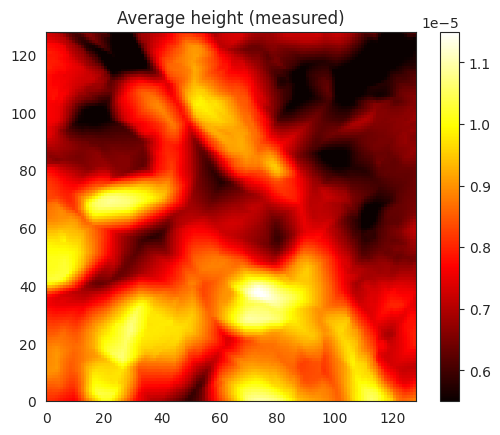

In [ ]:
p1.height()

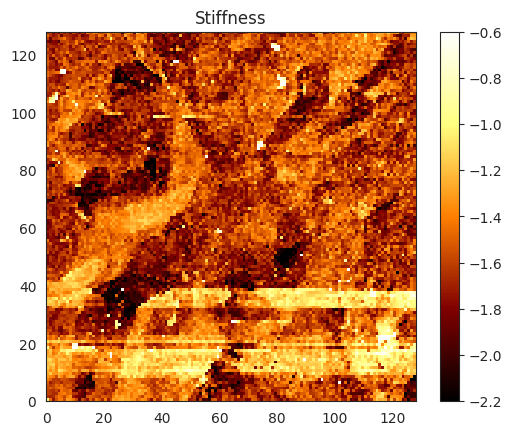

In [ ]:
p1.stiffness()

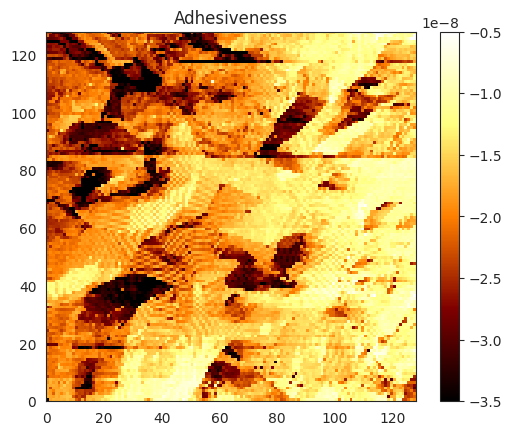

In [ ]:
p1.adhesiveness()

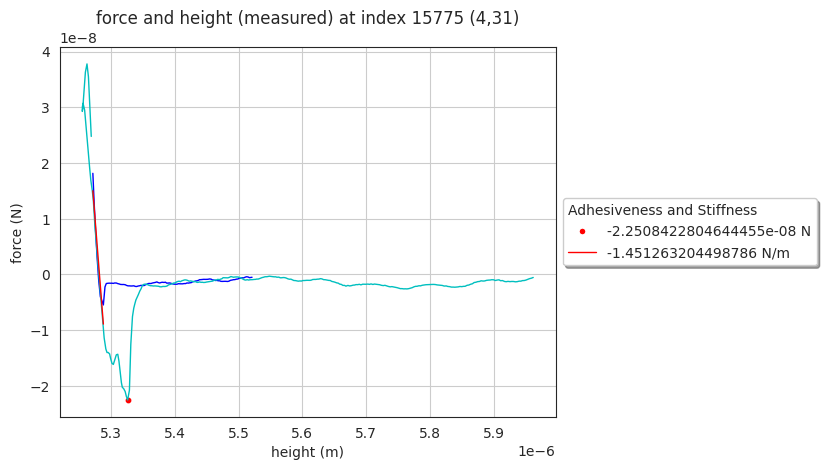

In [ ]:
p1.pixel(4,31)

In [ ]:
p1.save()